In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
import os, sys
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import curve_fit

../coeff_pe_1t_reflection0.00_30/file_+0.010.h5
(29, 29)


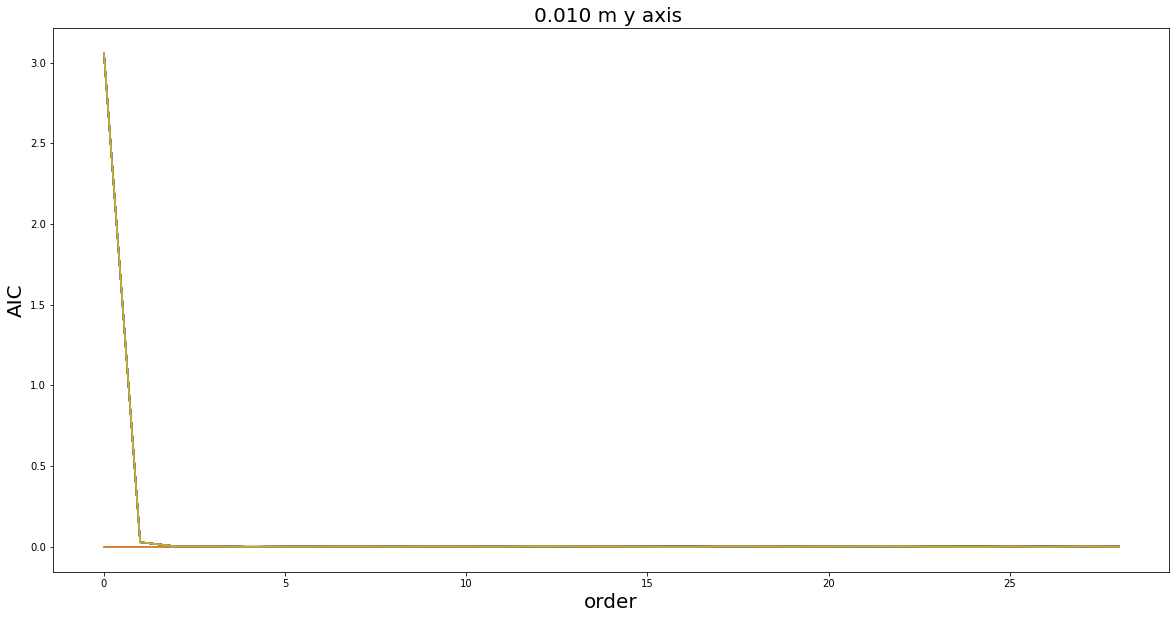

In [16]:
def LoadDataPE(path, radius, order, axis):
    order = order-1
    data = np.zeros((order, order))
    crv  = np.zeros((order))
    filename = path + 'file_+' + radius + '.h5'
    print(filename)
    h = tables.open_file(filename,'r')
    for i in np.arange(2,order):
        coeff = 'coeff' + str(i+1)
        aic = 'AIC' + str(i+1)
        COEFF = eval('h.root.'+coeff+'[()]')
        AIC = eval('h.root.'+aic+'[()]')
        data[i,0:i+1] = COEFF
        crv[i] = AIC
    h.close()
    return data, crv

path = '../coeff_pe_1t_reflection0.00_30/'
#ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.63, 0.002)))
ra = 0.010
order = 30
str_radius = '%.3f' % ra

data, crv = LoadDataPE(path, str_radius, order, axis)
print(data.shape)
start = 4
plt.figure(figsize=(20,10))
plt.plot(data.T)
plt.xlabel('order',fontsize=20)
plt.ylabel('AIC',fontsize=20)
plt.title('%.3f m y axis ' % ra,fontsize=20)
plt.show()

In [ ]:
def LoadDataPE(path, radius, order, axis):
    order = order-1
    data = np.zeros((order, order))
    crv  = np.zeros((order))
    filename = path + 'file_' + radius + '-' + axis + '.h5'
    print(filename)
    h = tables.open_file(filename,'r')
    for i in np.arange(order):
        coeff = 'coeff' + str(i+1)
        aic = 'AIC' + str(i+1)
        COEFF = eval('h.root.'+coeff+'[()]')
        AIC = eval('h.root.'+aic+'[()]')
        data[i,0:i+1] = COEFF
        crv[i] = AIC
    h.close()
    return data, crv

def plot(ra, axis):
    path = '../coeff_pe_1t_2.0MeV_dns_aic_sgl/'
    #ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.63, 0.002)))
    order = 25
    str_radius = '%.3f' % ra

    data, crv = LoadDataPE(path, str_radius, order, axis)
    start = 4
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(start,24,1)+1,crv[start:],\
            label = 'min order = %d' % ((np.where(crv==np.min(crv)))[0][0] + 1))
    plt.xlabel('order',fontsize=20)
    plt.ylabel('AIC',fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title('%.3f m %s axis ' %(ra,axis),fontsize=20)
    plt.legend(fontsize=20)
    plt.savefig('%sAIC%.3f.pdf' % (axis, ra))
    plt.show()

for i in np.arange(0.01,0.65,0.01):
    try:
        plot(i,'x')
    except:
        pass
for i in np.arange(0,0.65,0.01):    
    try:
        plot(i,'y')
    except:
        pass
for i in np.arange(0,0.65,0.01):    
    try:
        plot(i,'z')
    except:
        pass

In [5]:
import h5py
f=h5py.File('../coeff_pe_1t_8.0MeV_shell_90/file_+0.300.h5',"r")
a = f['coeff25'].value
print(a)

[ 4.39755092e+00  6.83004232e-01  3.53693883e-01 -3.56165675e-02
  1.58898600e-01 -1.20668156e-01  1.36540194e-01 -1.31163901e-01
  1.28745514e-01 -1.22720460e-01  1.16121093e-01 -1.05496793e-01
  9.72117920e-02 -8.56396653e-02  7.49595627e-02 -6.40776412e-02
  5.16981014e-02 -4.07793943e-02  3.12501287e-02 -2.09464379e-02
  1.26276282e-02 -5.01495526e-03 -2.03193482e-03  8.01841096e-03
 -8.15350118e-03]


<ipython-input-5-ae38edac4678>:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  a = f['coeff25'].value


In [1]:
import tables
path = '../coeff_pe_1t_reflection0.00_30/'
radiuss = np.arange(0.01,0.65,0.01)
for index, radius in enumerate(radiuss):
    h = tables.open_file(path+'file_+%.3f.h5' % radius)
    data = []
    orders = np.arange(2,90)
    for order in orders:
        data.append(eval('h.root.AIC%d[()]'% order))
    h.close()
    plt.figure(index+1, dpi=150)
    plt.plot(orders, data - np.min(data) + 1)
    plt.semilogy()
    plt.xlabel('order')
    plt.ylabel('AIC value')
    plt.title('radius: %.3f' % radius)
    plt.savefig('fig/radius_%.3f.png' % radius)
    plt.show()

NameError: name 'np' is not defined

In [39]:
import ROOT
h = ROOT.TFile('/mnt/stage/douwei/Simulation/1t_root/8.0MeV_shell/1t_+0.500_1.root')
h.SimTriggerInfo

In [40]:
h = tables.open_file('../coeff_pe_1t_2.0MeV_dns_aic_total1/file_0.010.h5')
print(h.root.AIC)

NoSuchNodeError: group ``/`` does not have a child named ``AIC``

In [42]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
print(sm.GLM.__doc__)


    Generalized Linear Models

    GLM inherits from statsmodels.base.model.LikelihoodModel

    Parameters
    ----------
    endog : array_like
        1d array of endogenous response variable.  This array can be 1d or 2d.
        Binomial family models accept a 2d array with two columns. If
        supplied, each observation is expected to be [success, failure].
    exog : array_like
        A nobs x k array where `nobs` is the number of observations and `k`
        is the number of regressors. An intercept is not included by default
        and should be added by the user (models specified using a formula
        include an intercept by default). See `statsmodels.tools.add_constant`.
    family : family class instance
        The default is Gaussian.  To specify the binomial distribution
        family = sm.family.Binomial()
        Each family can take a link instance as an argument.  See
        statsmodels.family.family for more information.
    offset : array_like or None
    

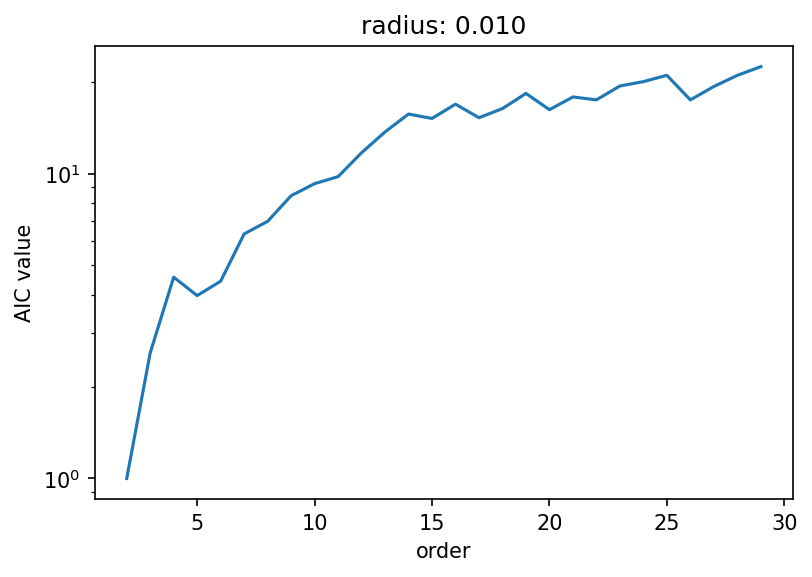

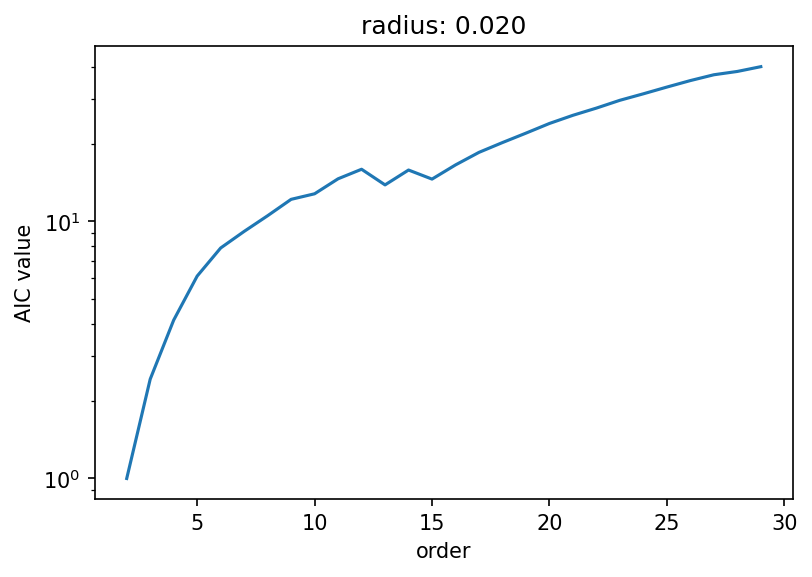

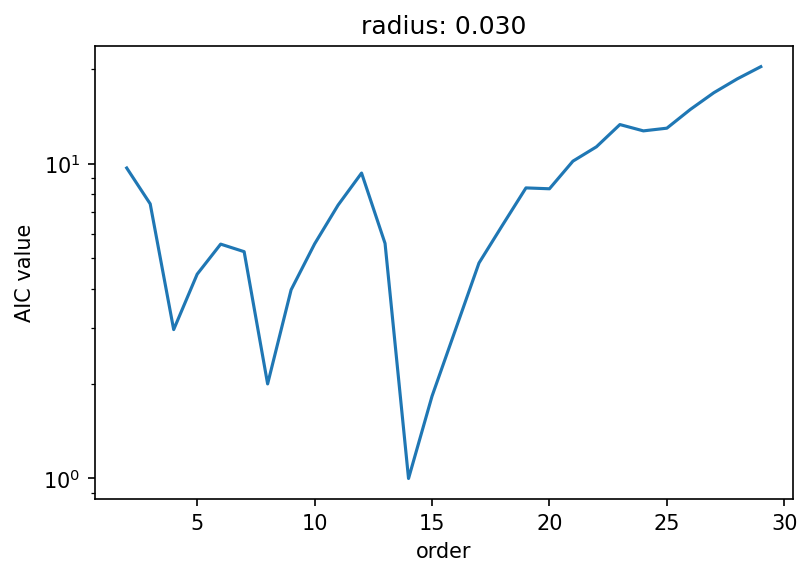

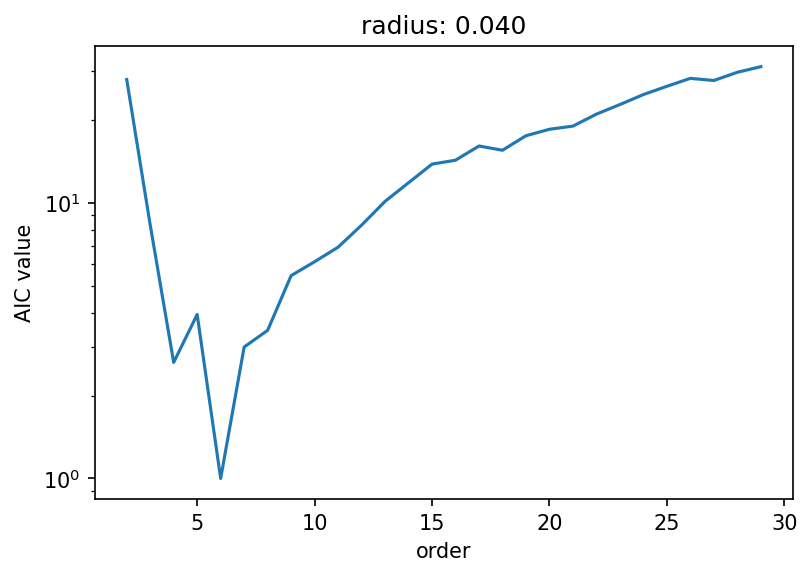

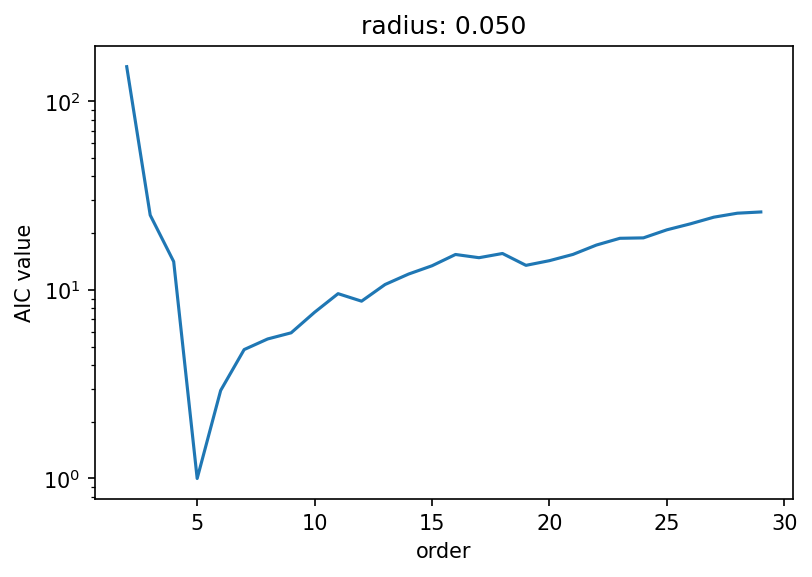

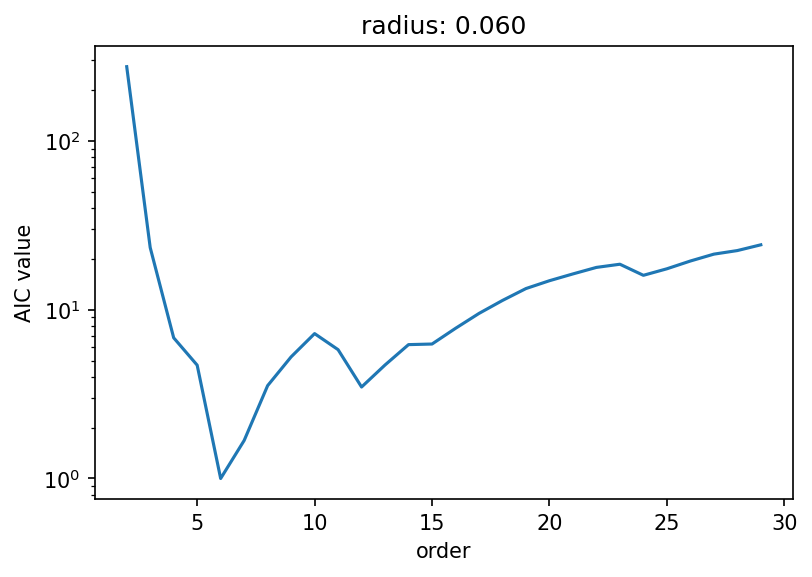

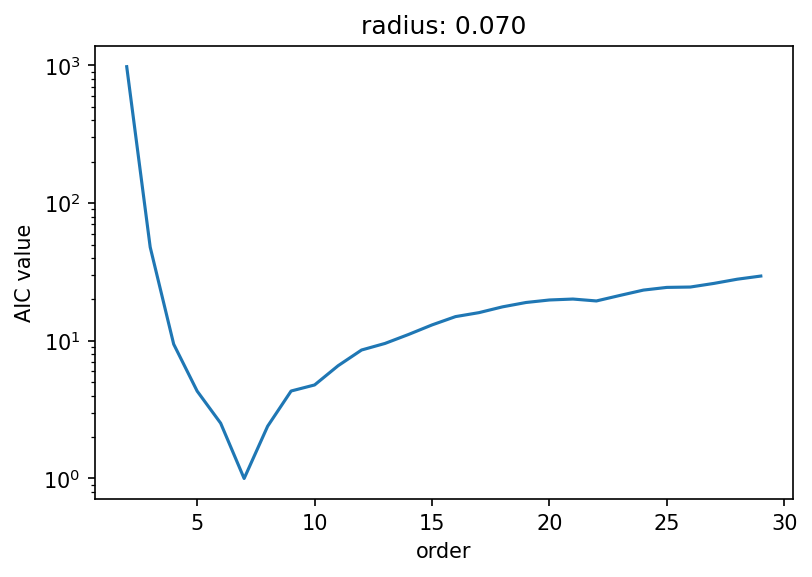

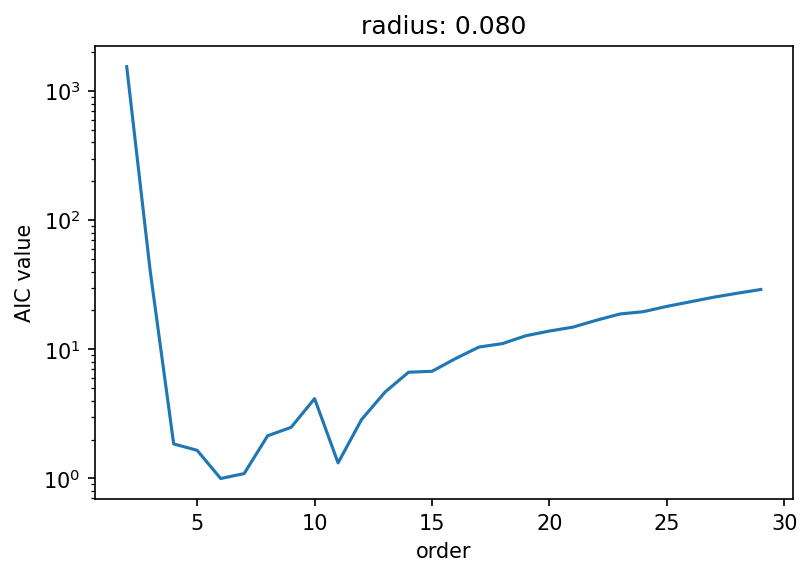

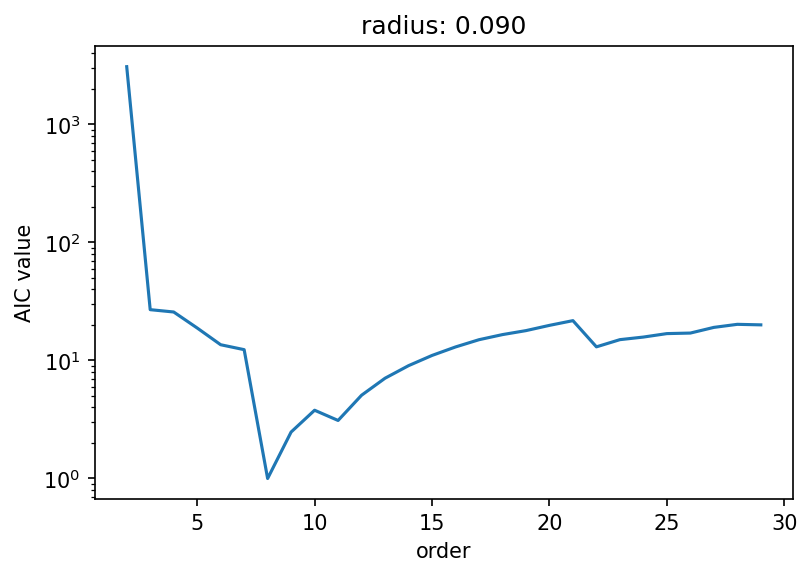

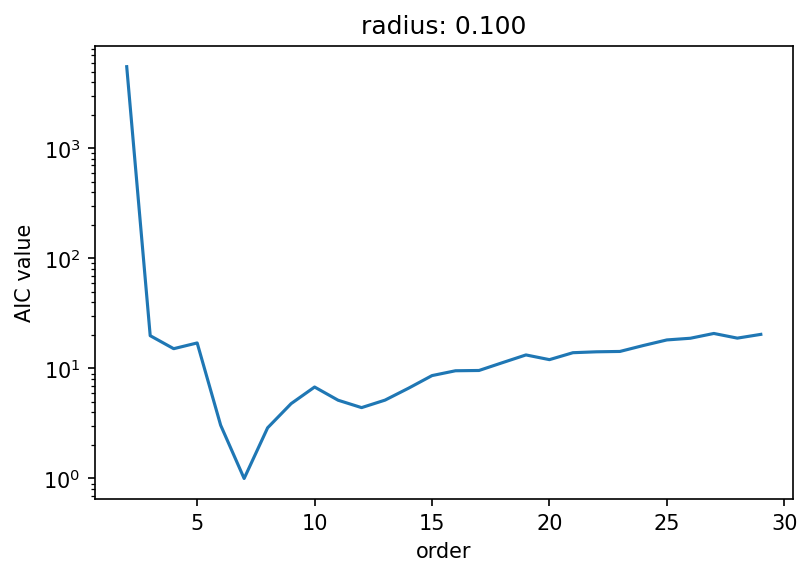

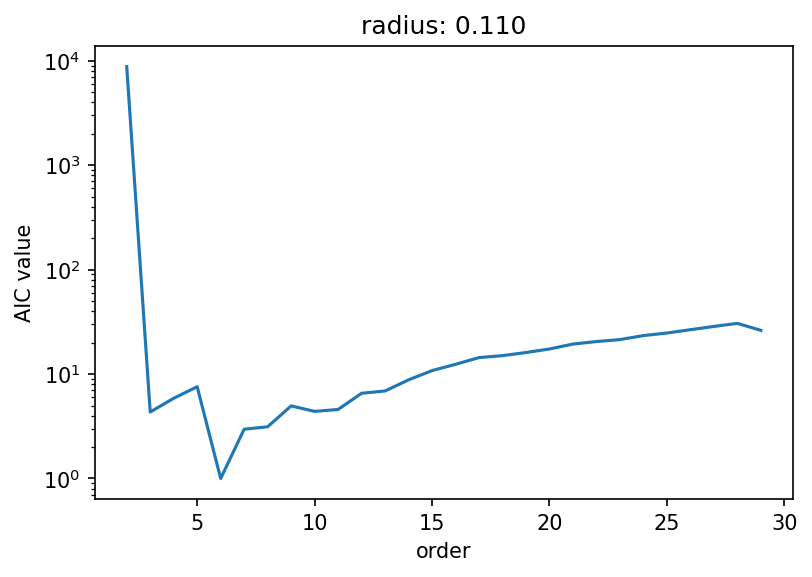

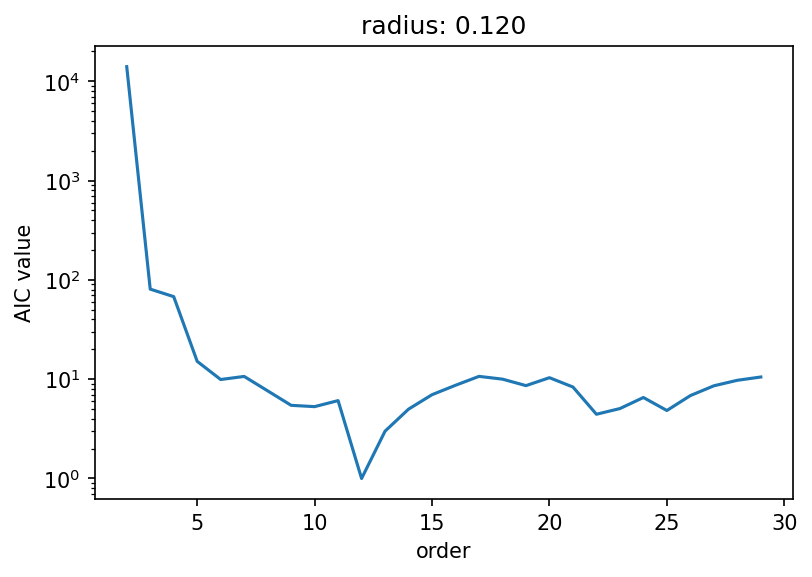

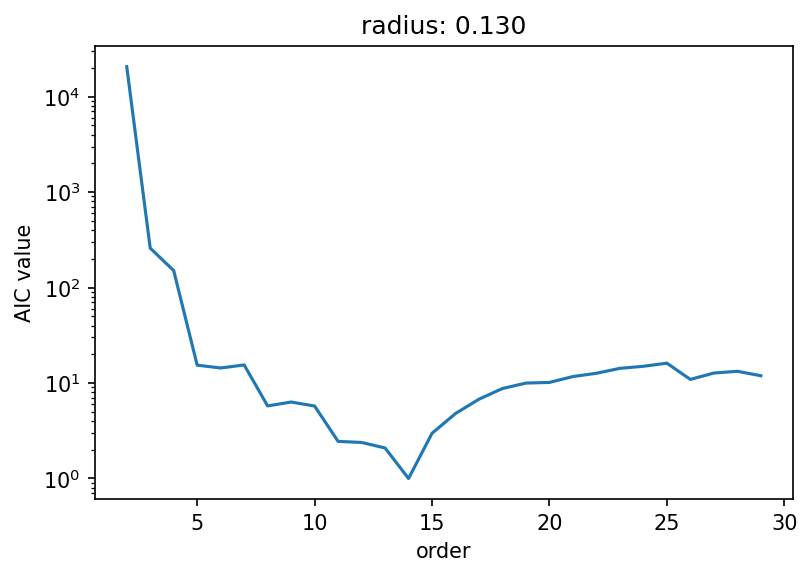

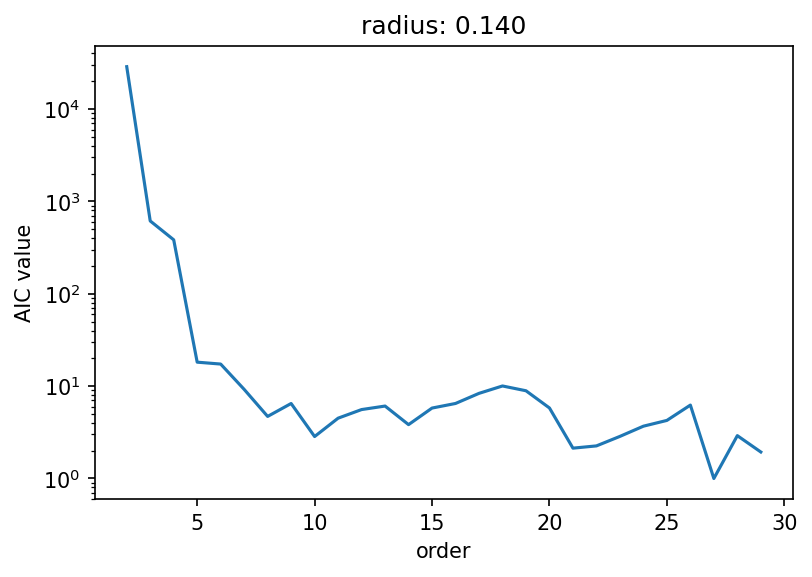

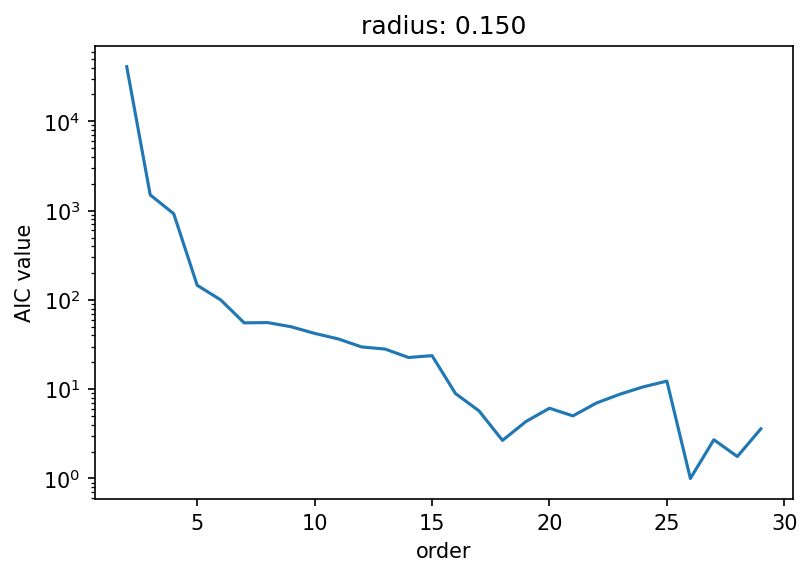

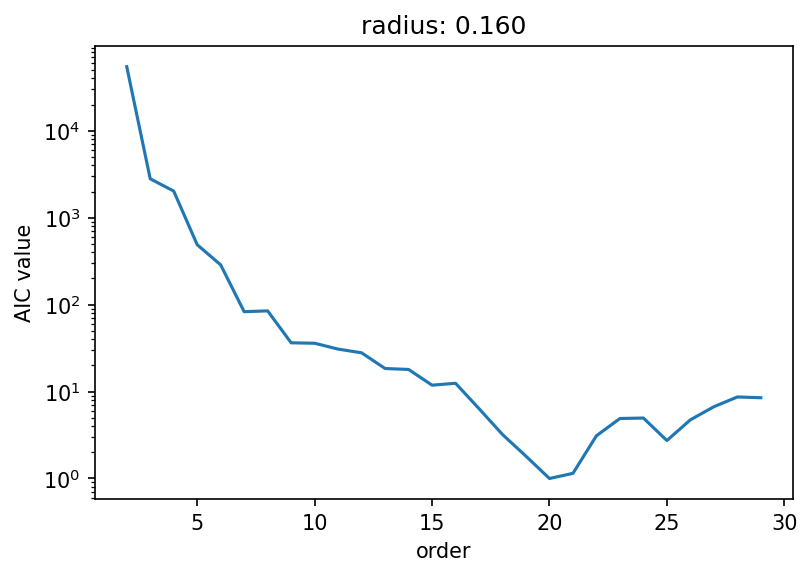

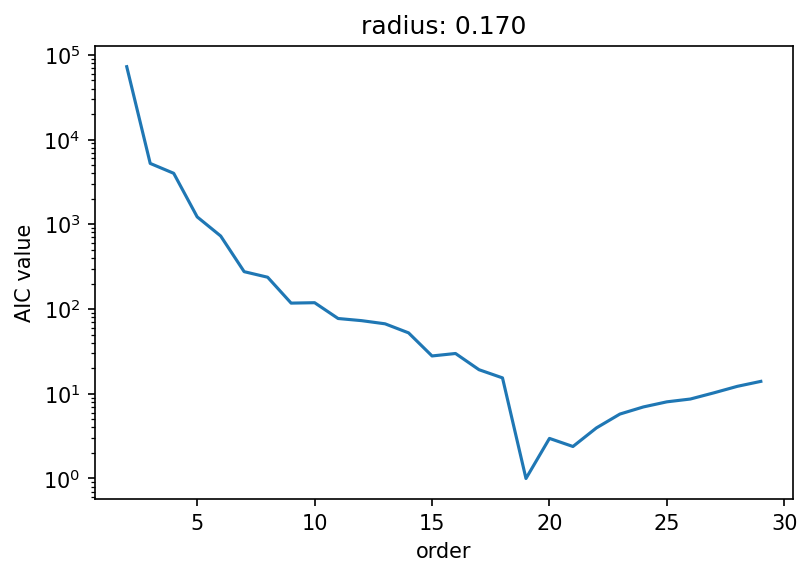

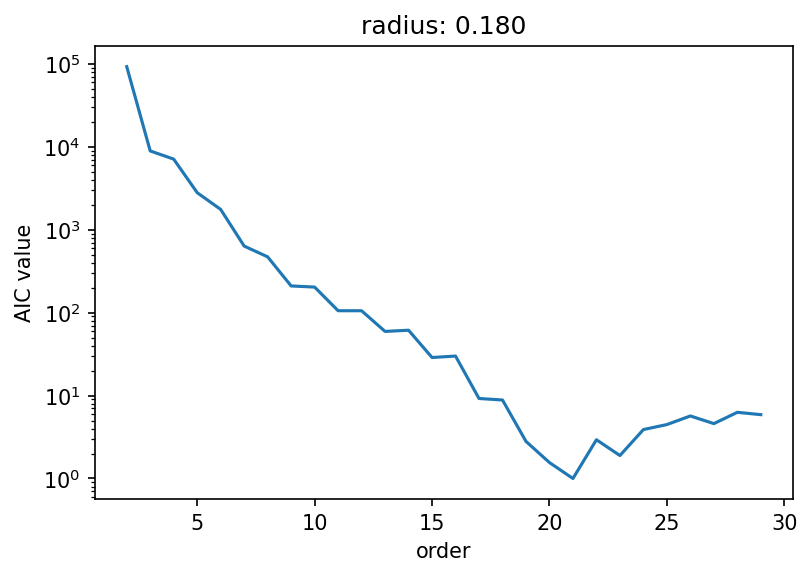

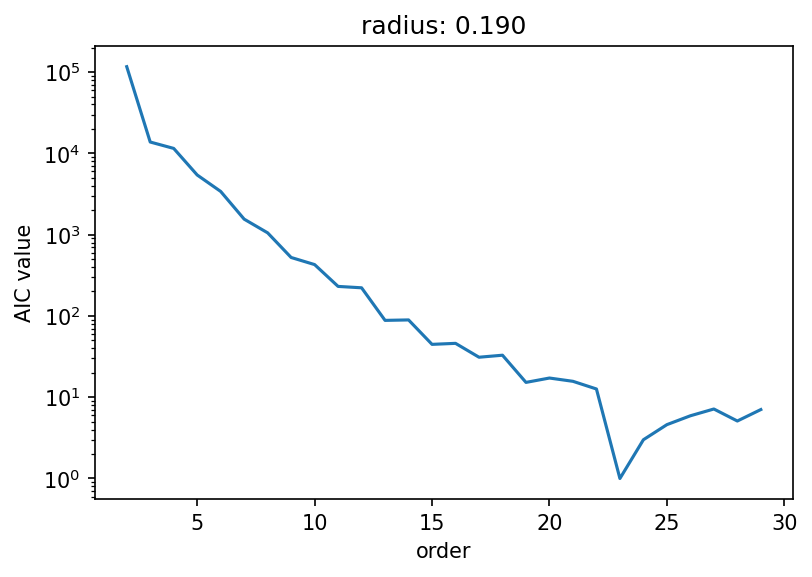

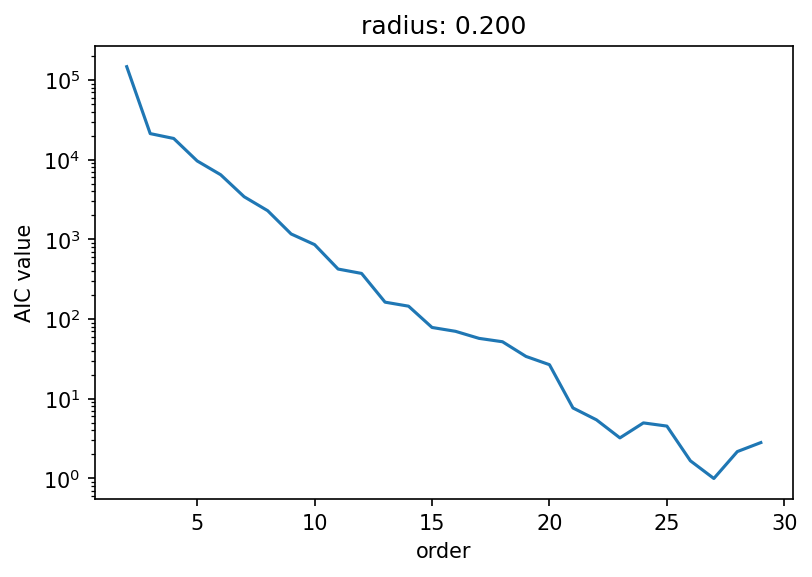

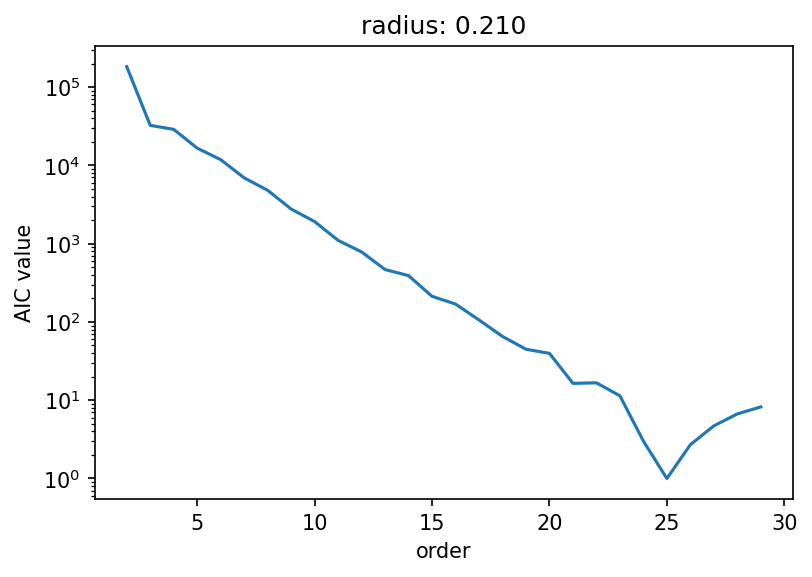

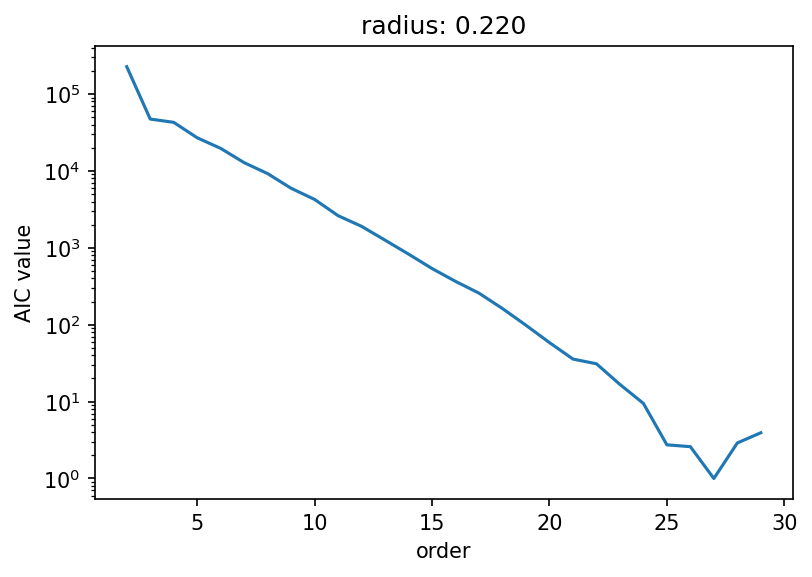

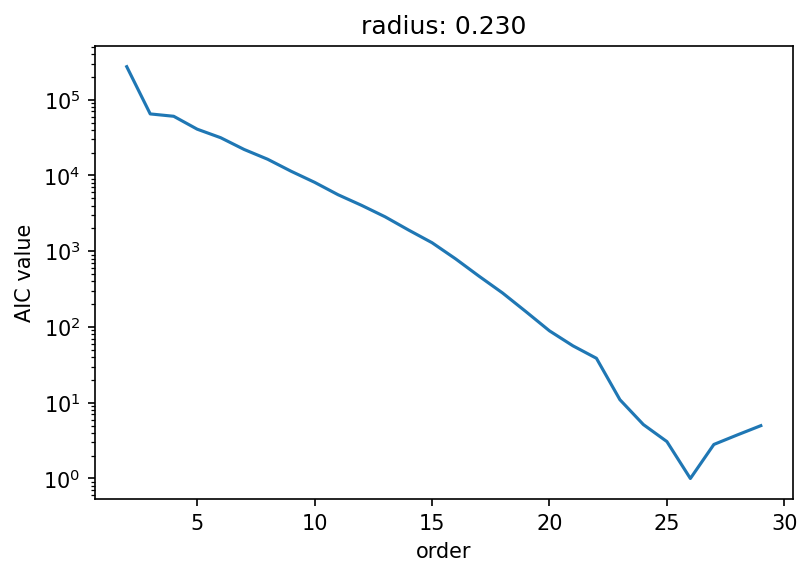

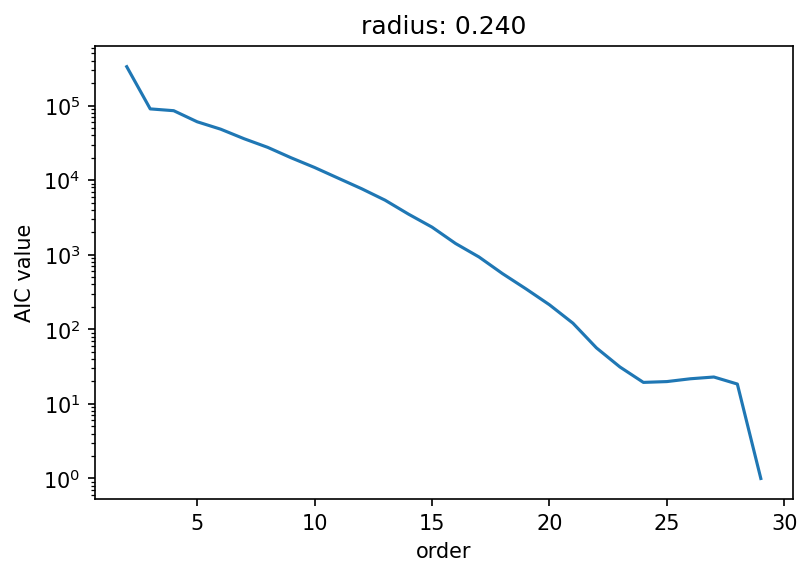

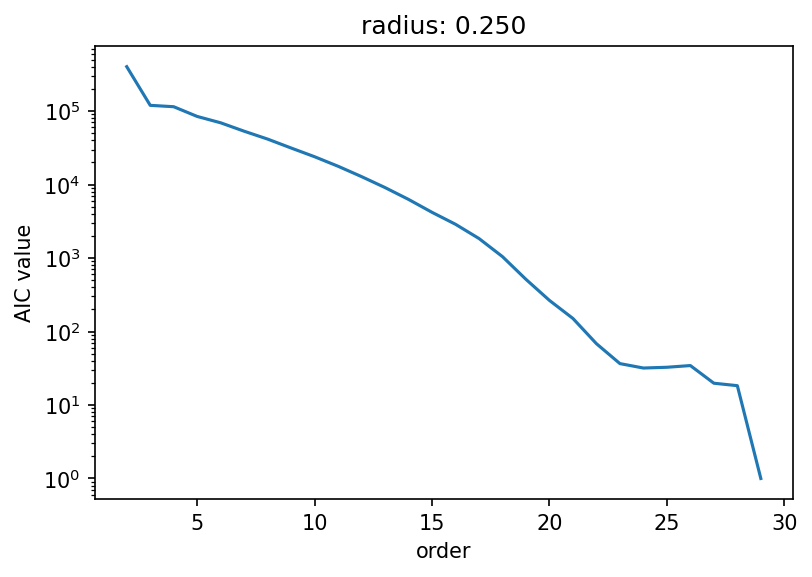

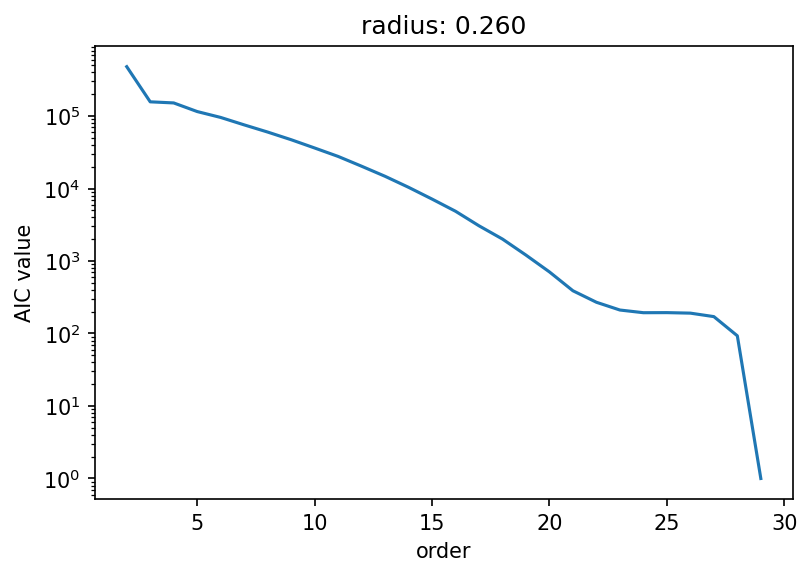

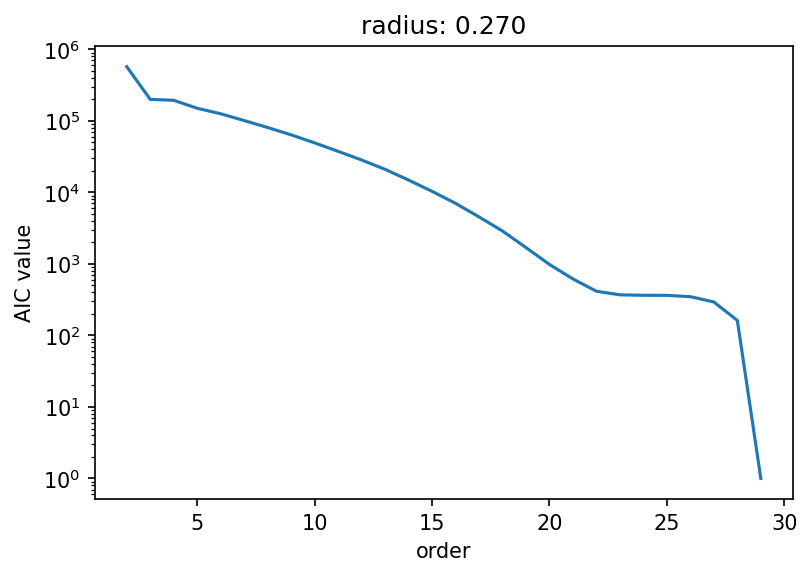

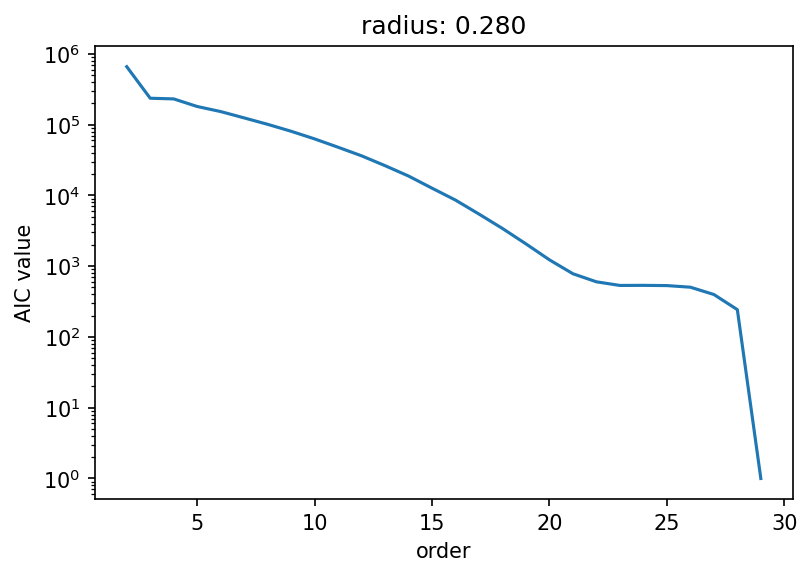

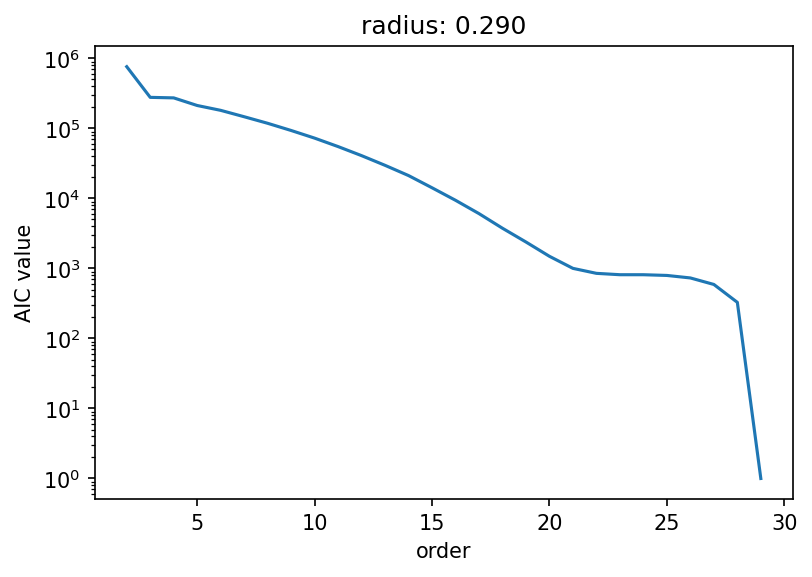

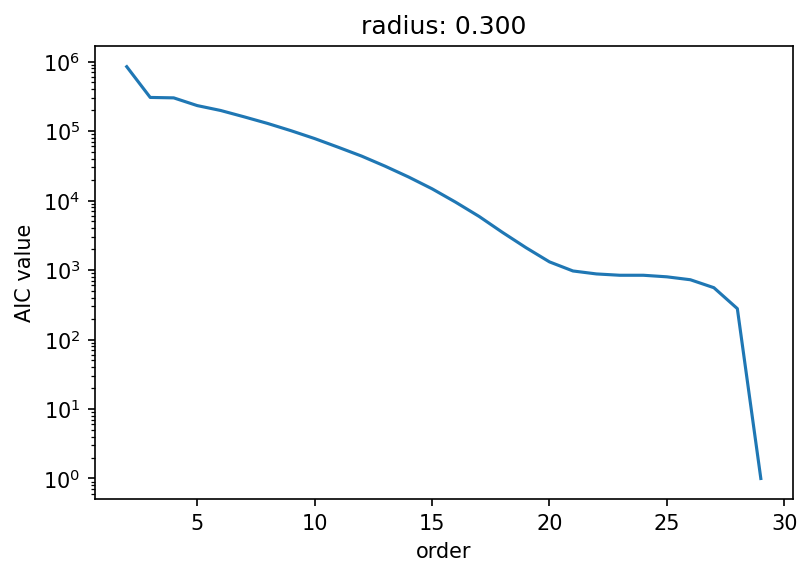

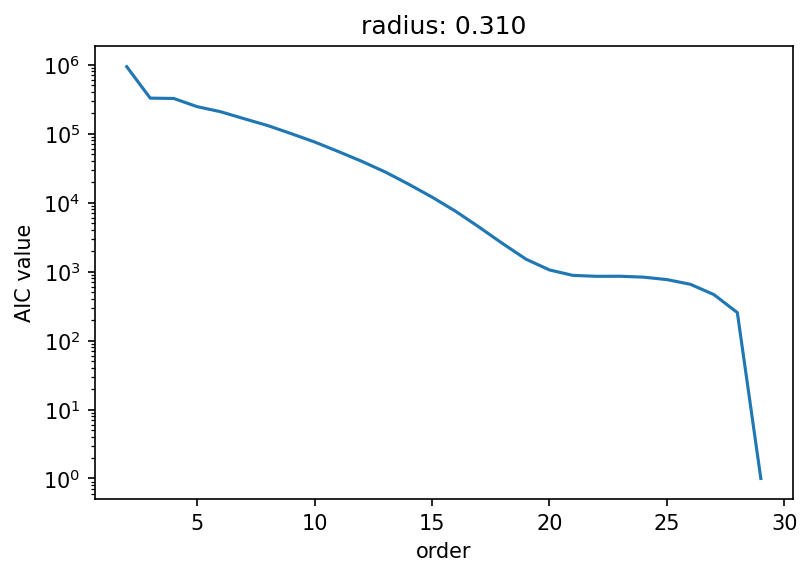

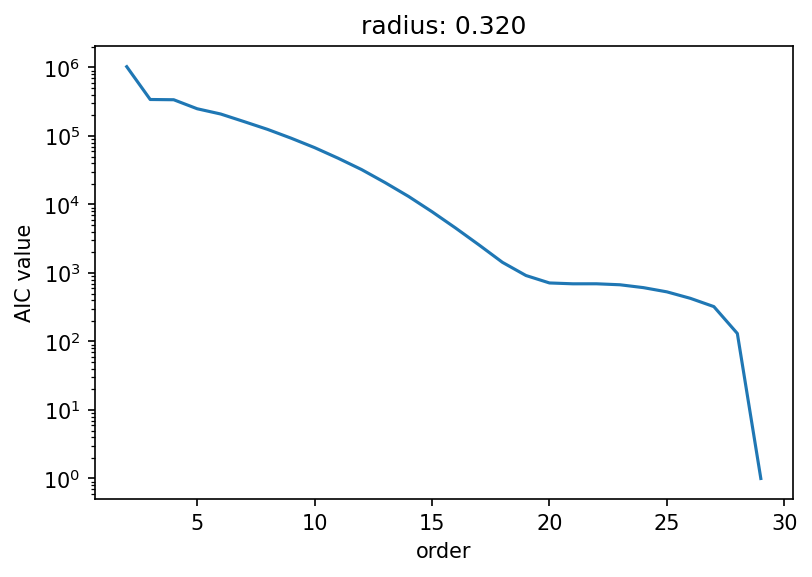

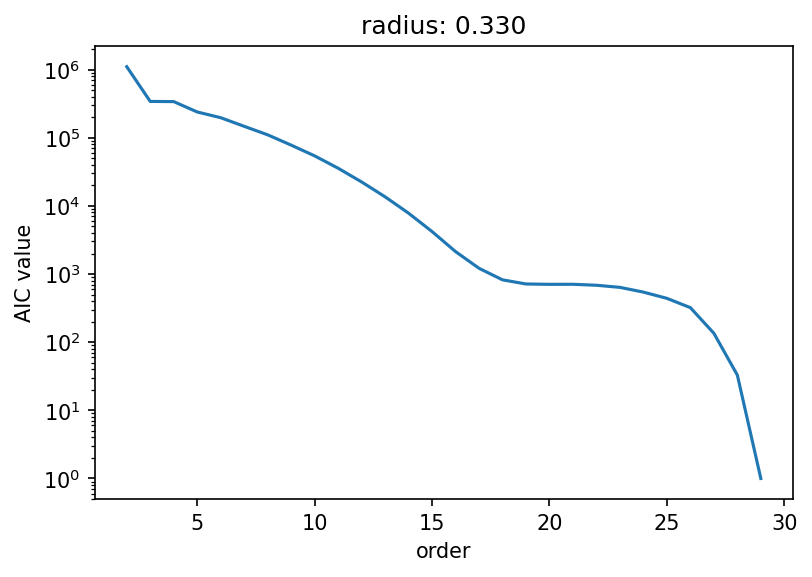

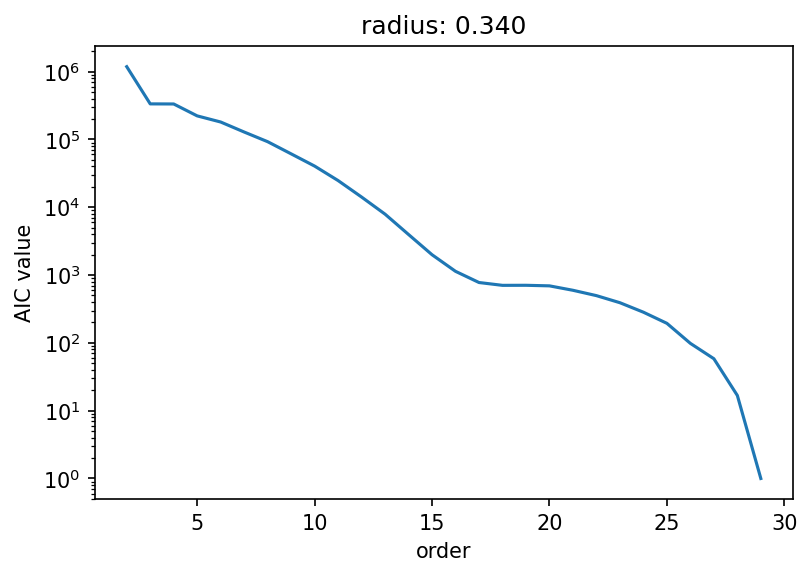

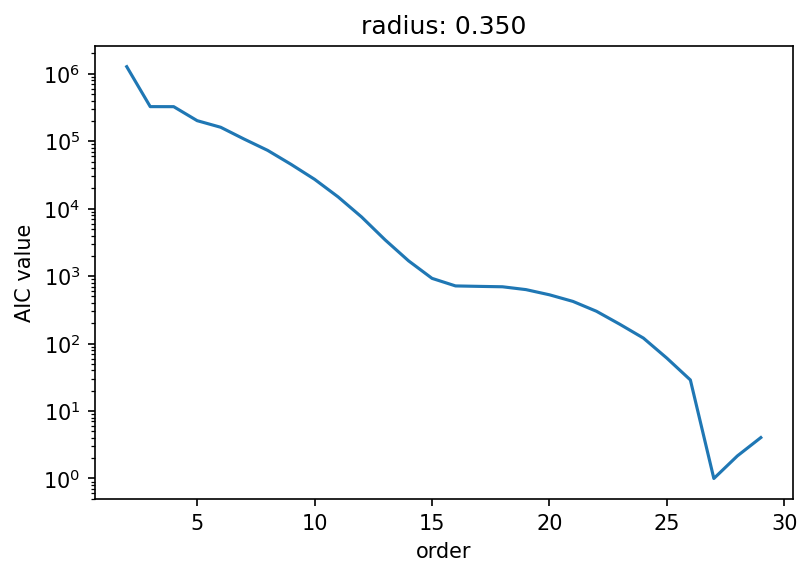

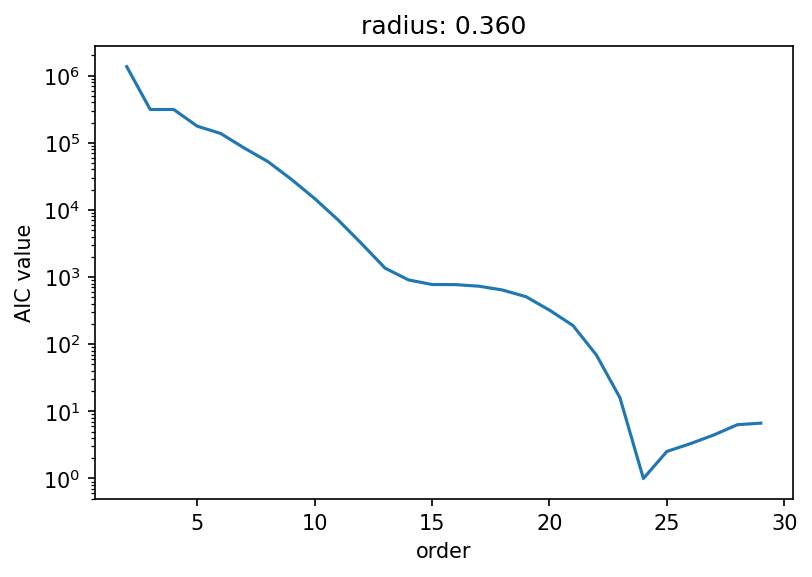

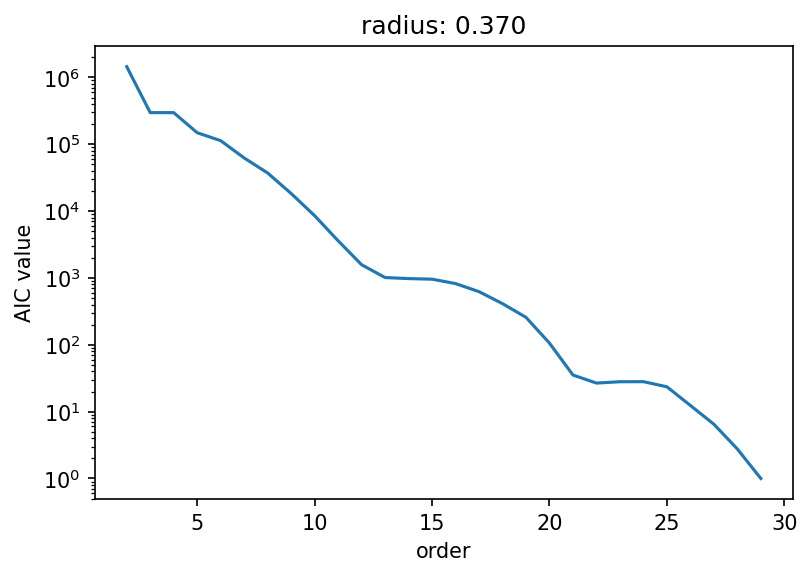

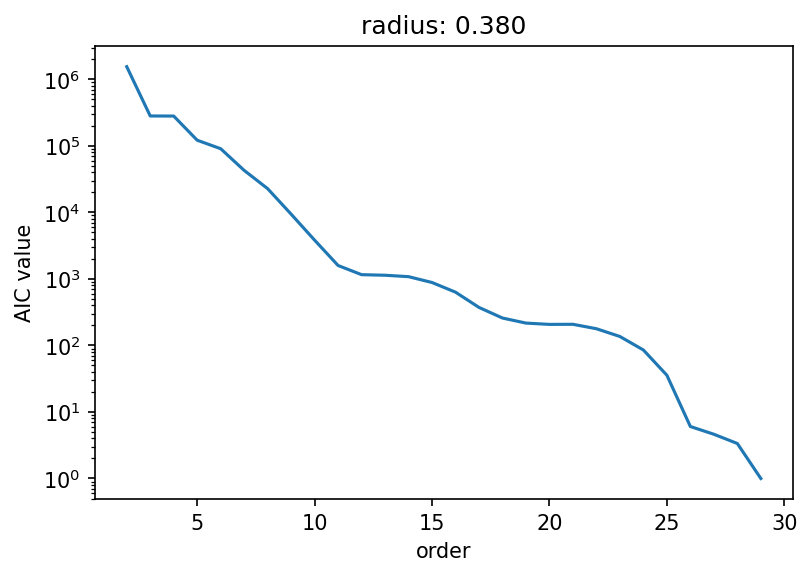

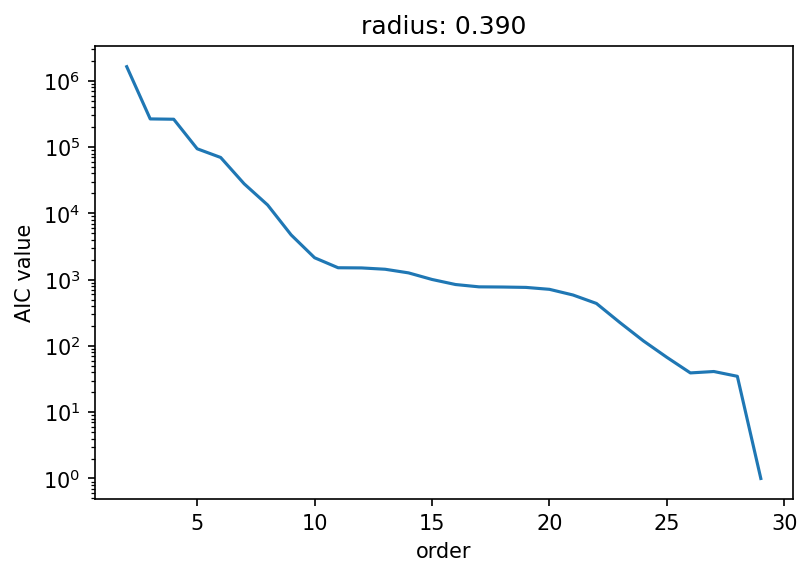

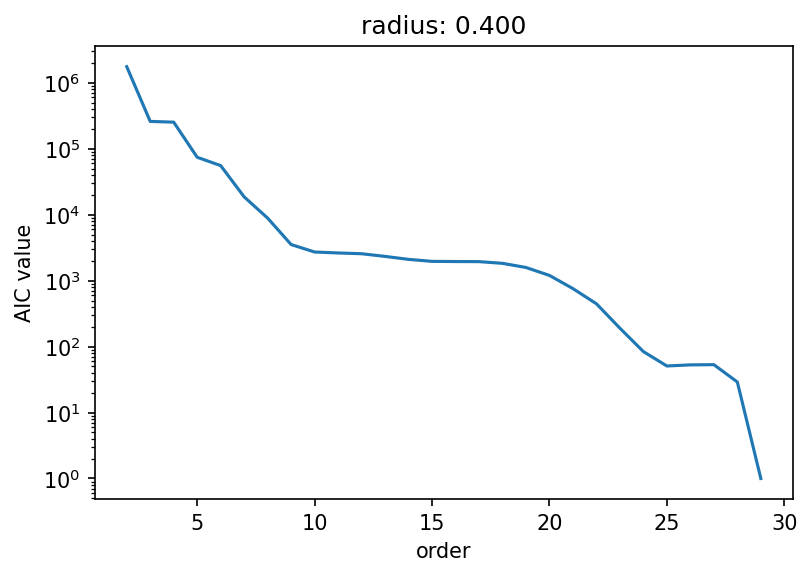

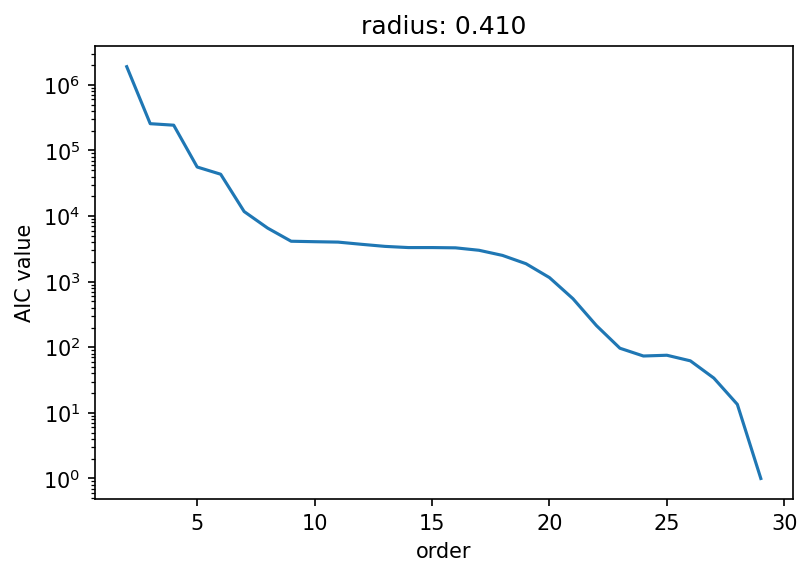

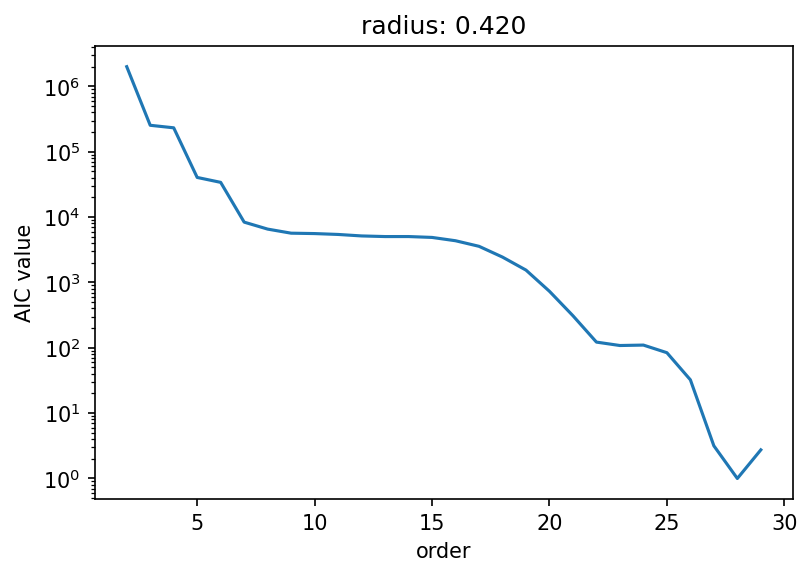

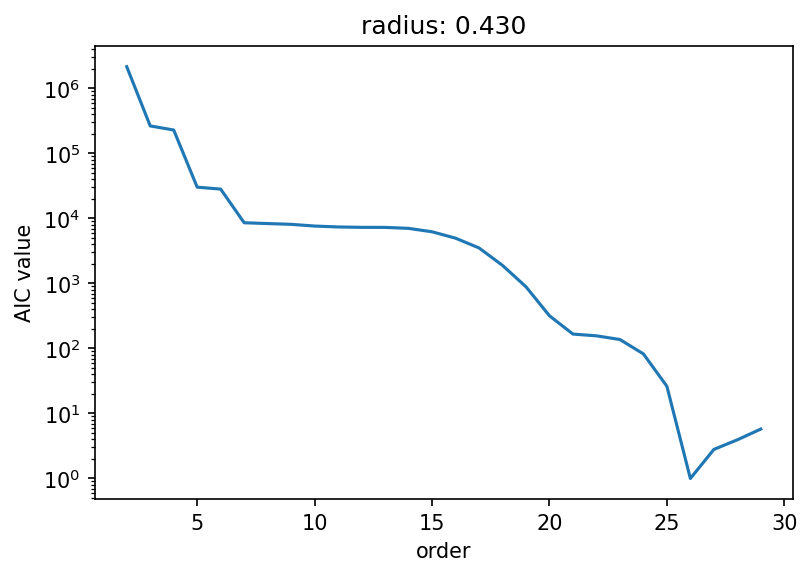

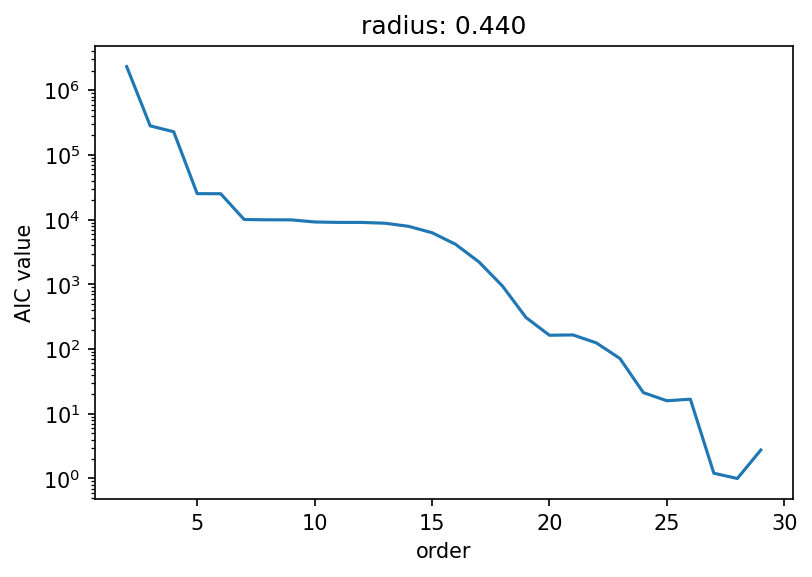

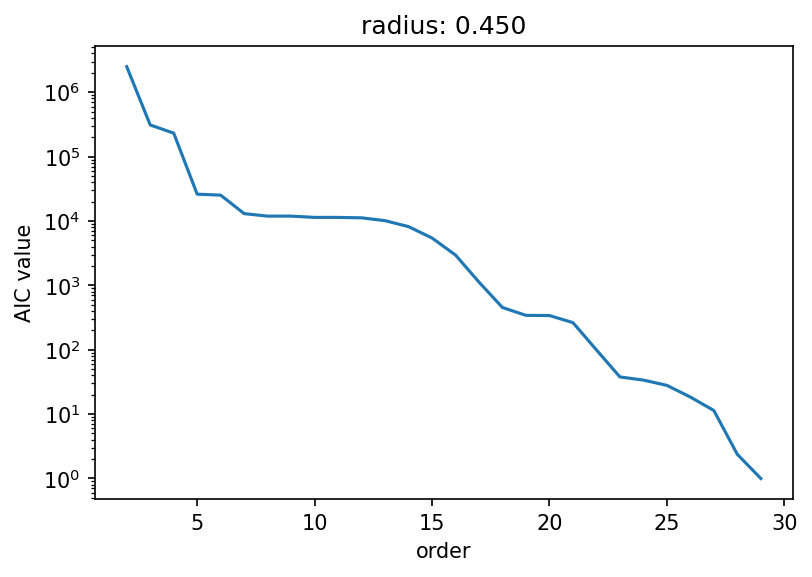

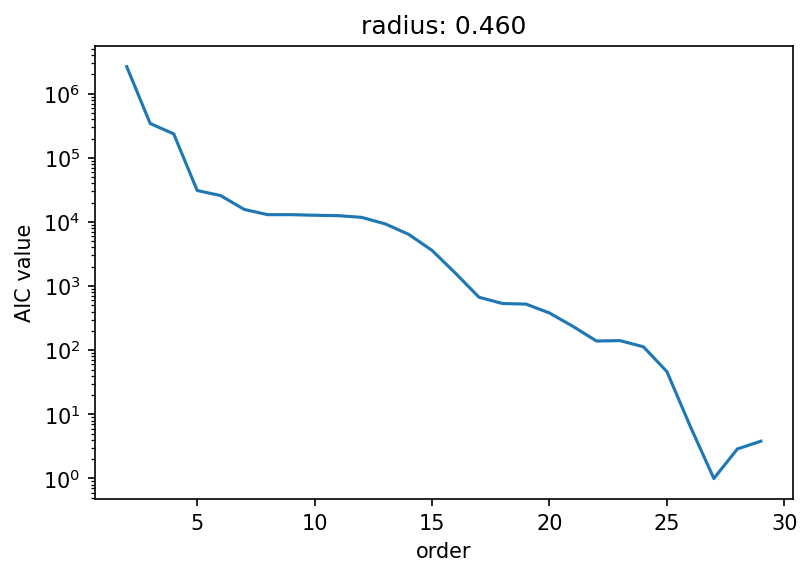

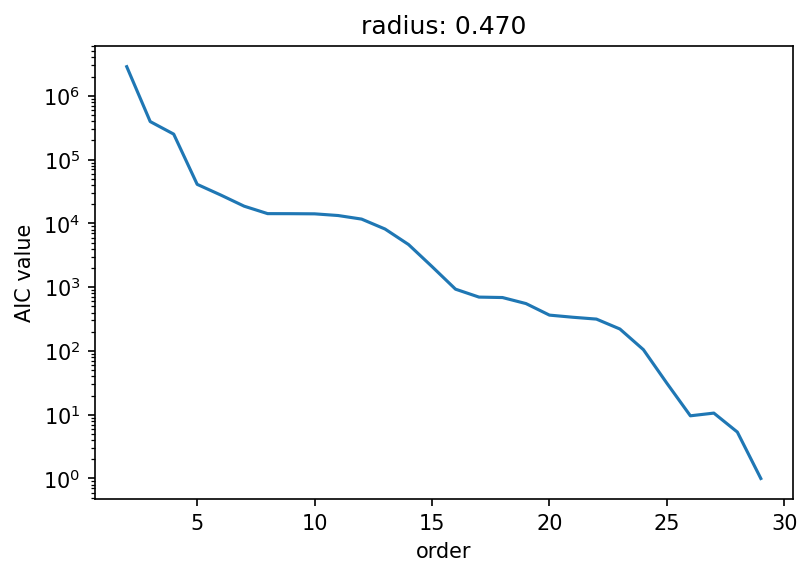

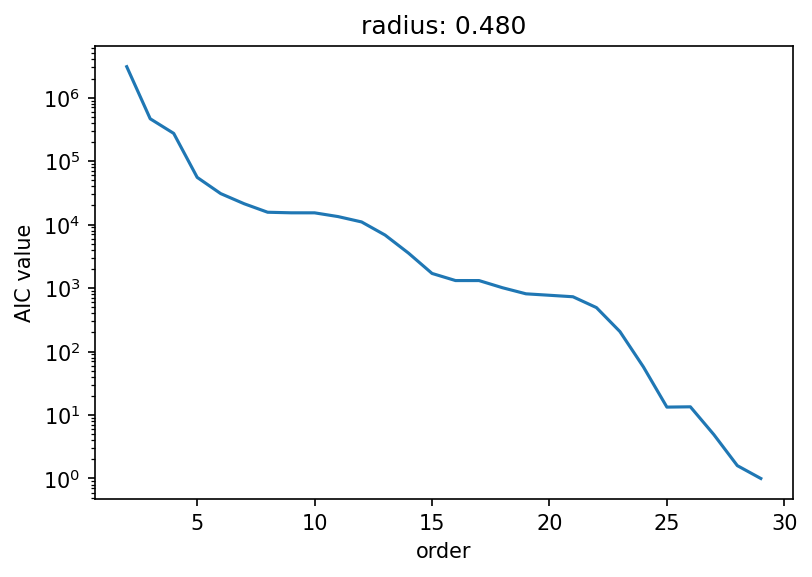

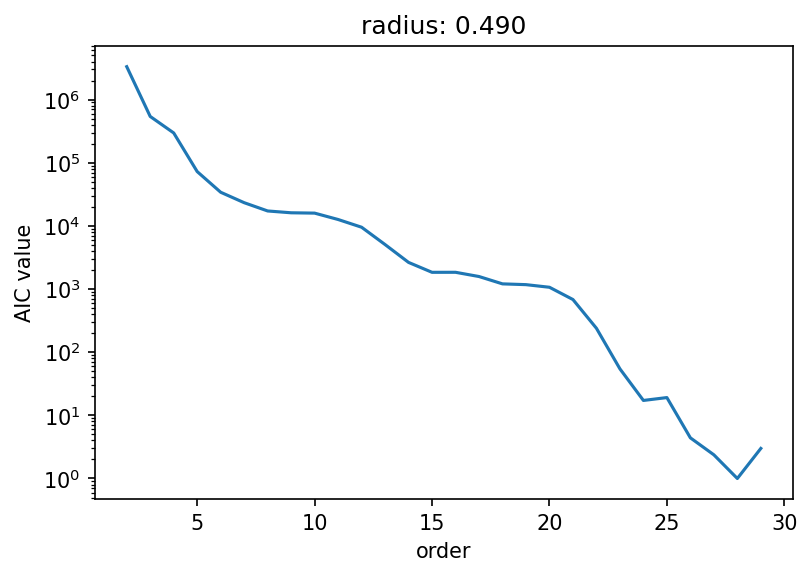

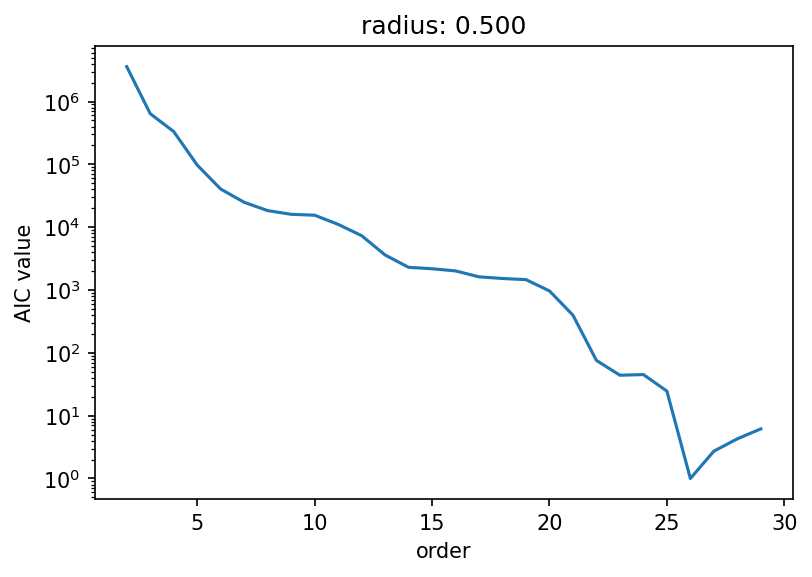

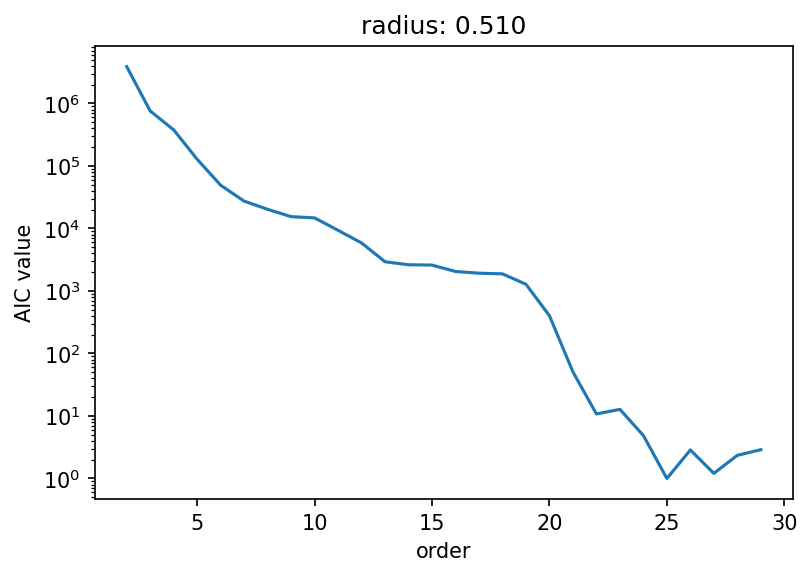

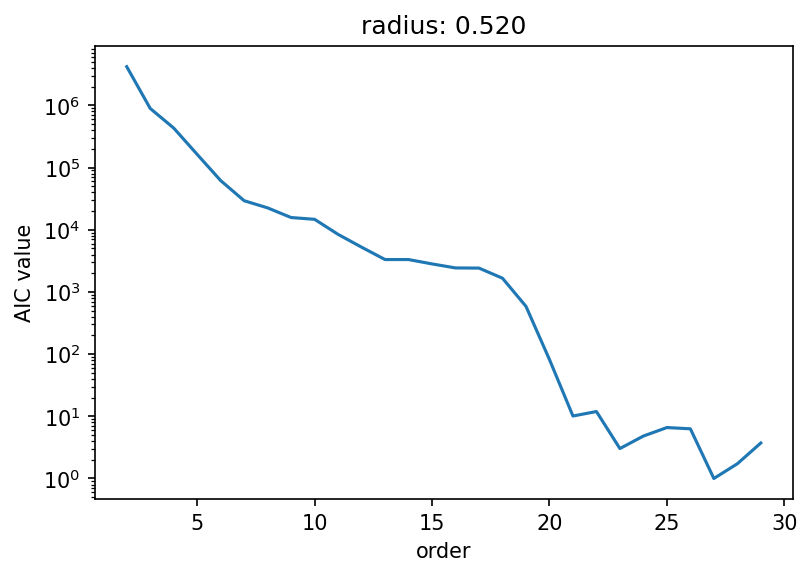

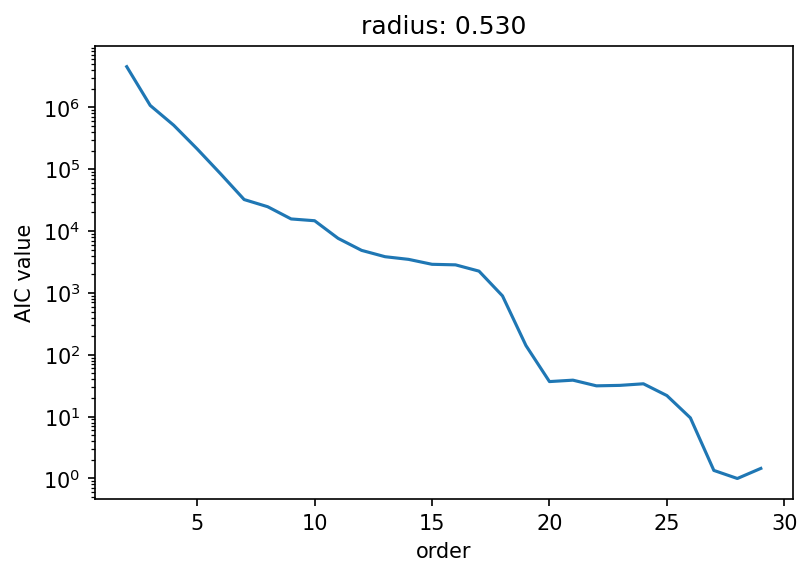

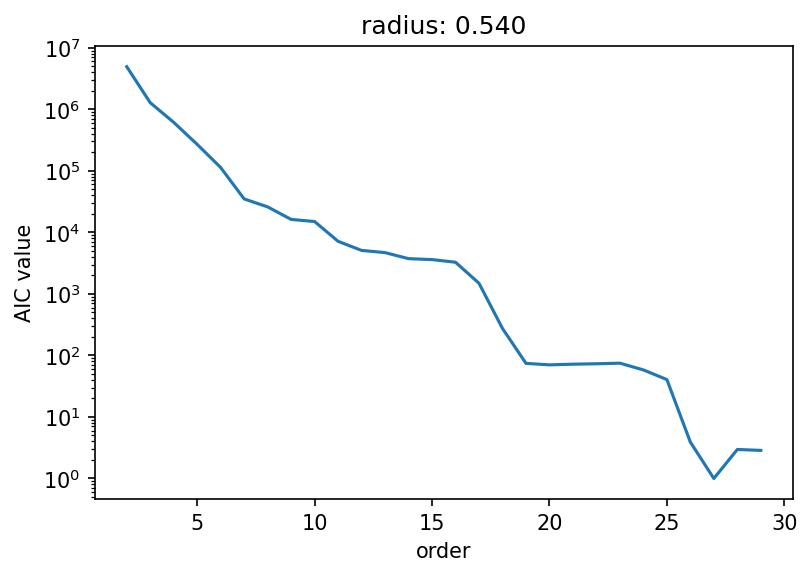

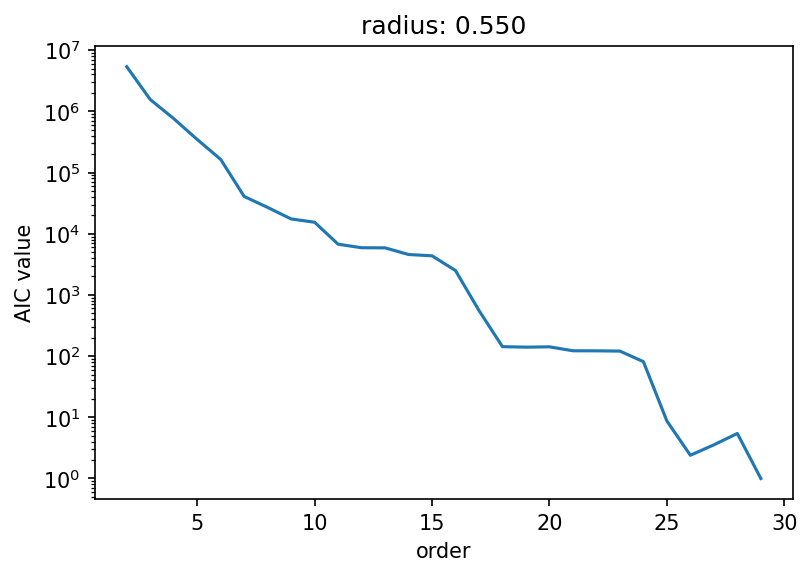

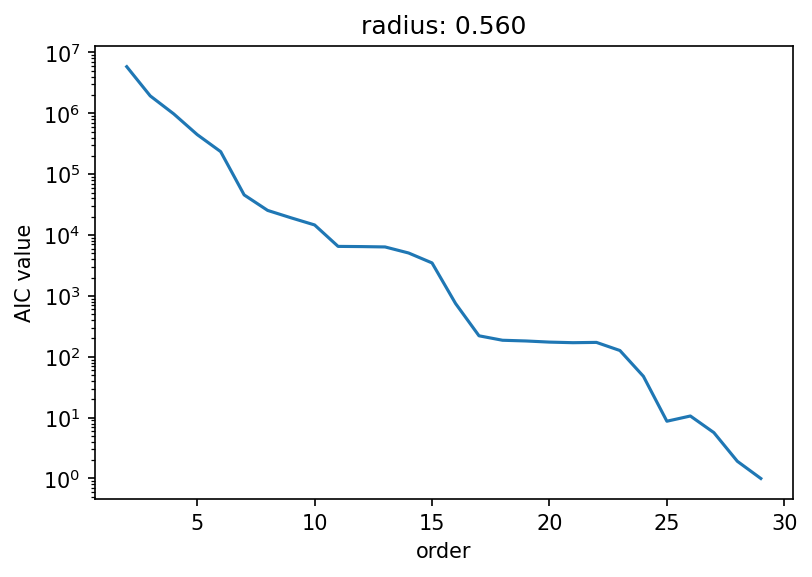

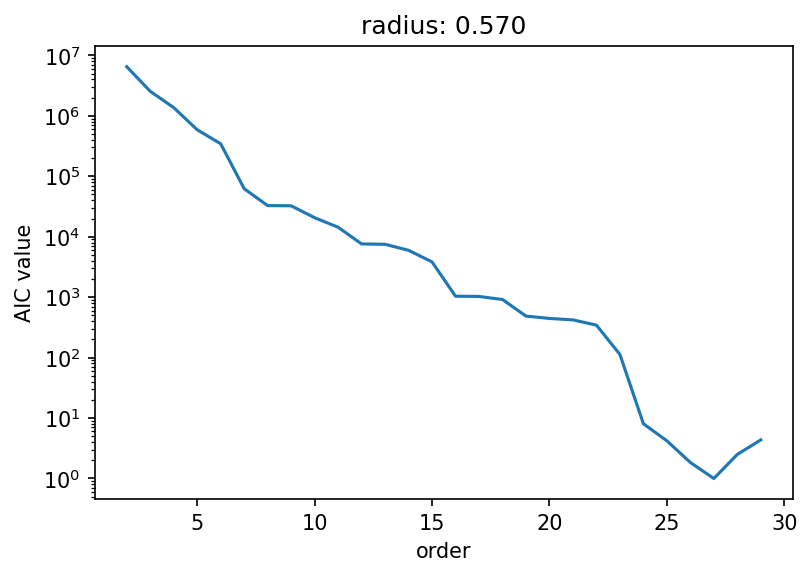

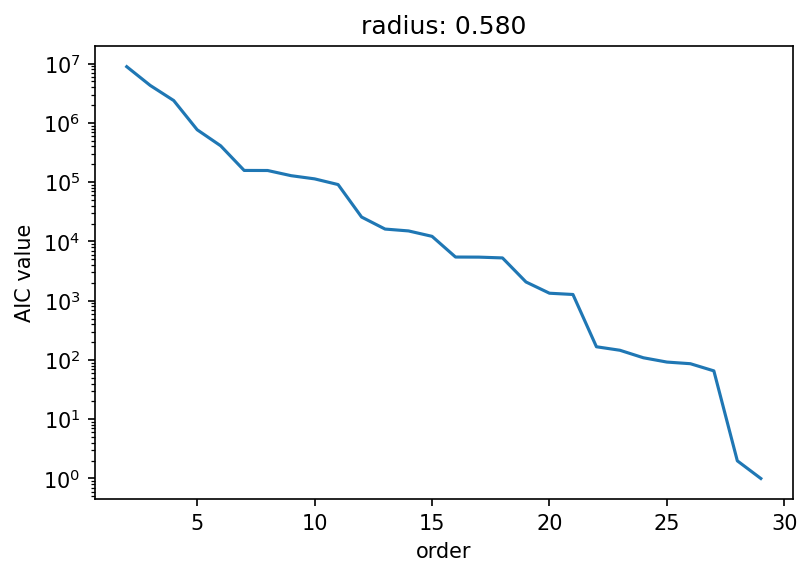

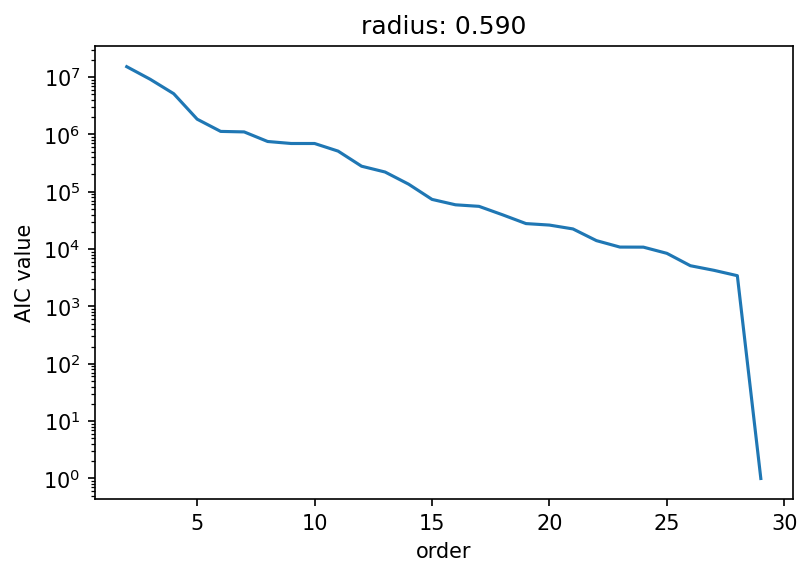

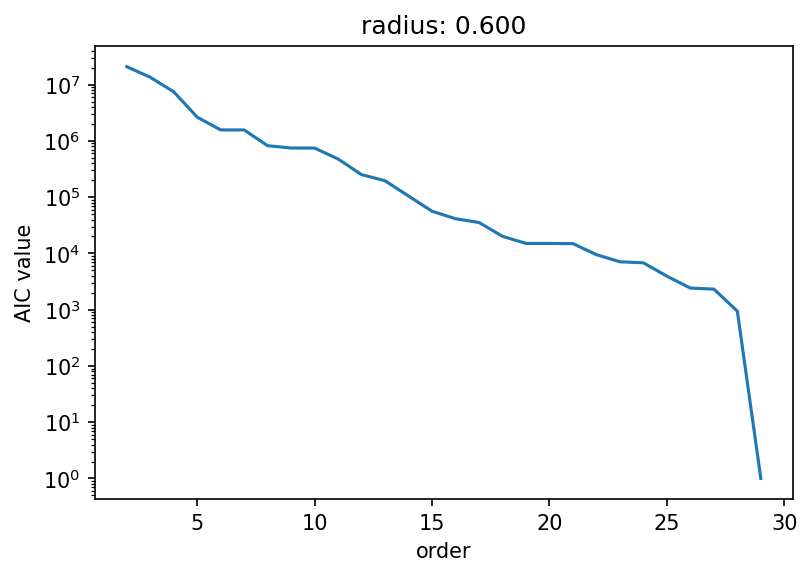

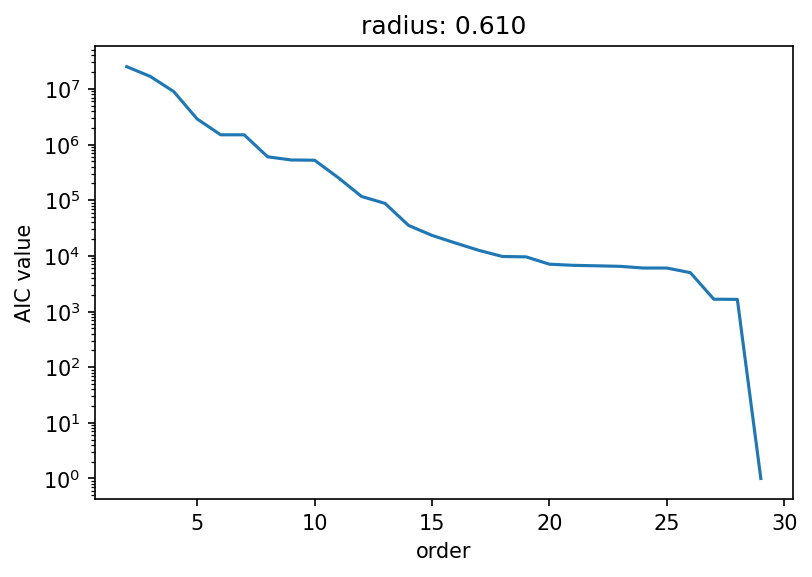

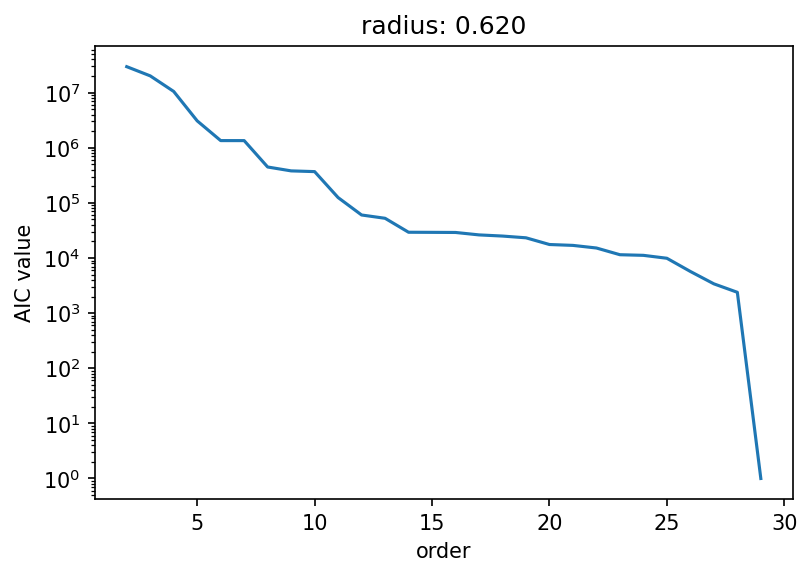

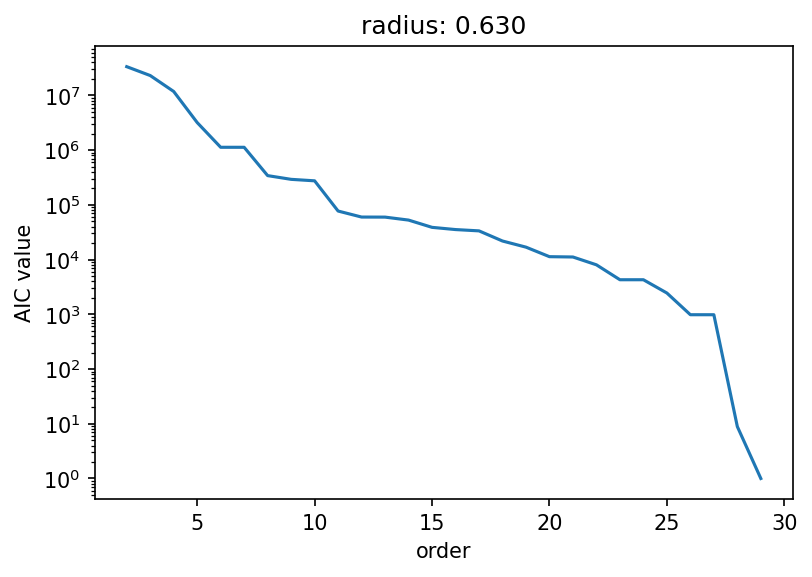

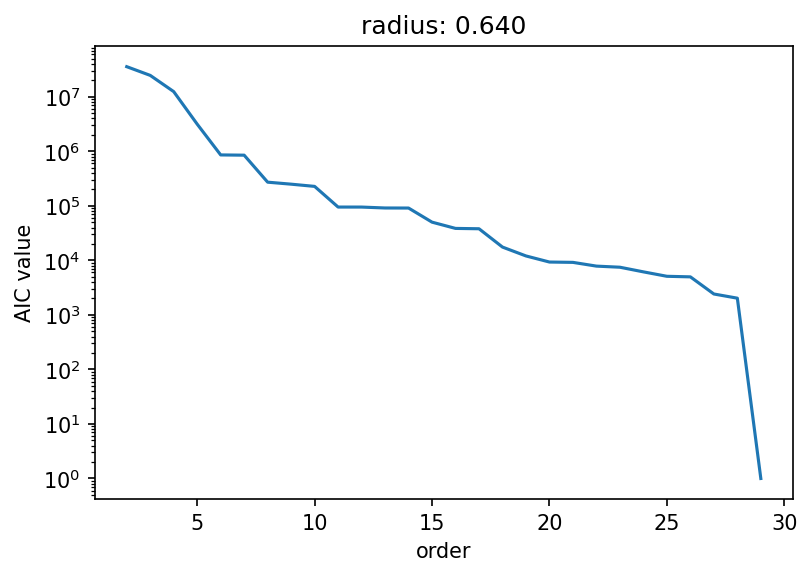

In [10]:
import tables
path = '../coeff_pe_1t_reflection0.03_30/'
radiuss = np.arange(0.01,0.65,0.01)
for index, radius in enumerate(radiuss):
    h = tables.open_file(path+'file_+%.3f.h5' % radius)
    data = []
    orders = np.arange(2,30)
    for order in orders:
        data.append(eval('h.root.AIC%d[()]'% order))
    h.close()
    plt.figure(index+1, dpi=150)
    plt.plot(orders, data - np.min(data) + 1)
    plt.semilogy()
    plt.xlabel('order')
    plt.ylabel('AIC value')
    plt.title('radius: %.3f' % radius)
    #plt.savefig('fig/radius_%.3f.png' % radius)
    plt.show()